In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import keras
import random
import sys
# Run in case warnings should be ignored
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',300)


In [2]:

df01 = pd.read_csv("freecodecamp_casual_chatroom.csv")


In [3]:
df01.head()

,Unnamed: 0,editedAt,fromUser,fromUser.avatarUrl,fromUser.avatarUrlMedium,fromUser.avatarUrlSmall,fromUser.displayName,fromUser.gv,fromUser.id,fromUser.removed,...,issues,mentions,meta,readBy,sent,status,text,unread,urls,v
0,0,NaN,NaN,NaN,https://avatars2.githubusercontent.com/u/2199663?v=3&s=128,https://avatars2.githubusercontent.com/u/2199663?v=3&s=60,Charles Watson,3.0,546fd99cdb8155e6700d6ec8,NaN,...,[],[],[],22,2014-12-31T23:01:35.647Z,NaN,no legumes either,False,[],1
1,1,NaN,NaN,NaN,https://avatars0.githubusercontent.com/u/10361101?v=3&s=128,https://avatars0.githubusercontent.com/u/10361101?v=3&s=60,janetwalters008,NaN,54a47e0cdb8155e6700e486e,NaN,...,[],[],[],21,2014-12-31T23:02:51.600Z,NaN,That bullet proof coffee sounds insane.,False,[],1
2,2,NaN,NaN,NaN,https://avatars0.githubusercontent.com/u/10361101?v=3&s=128,https://avatars0.githubusercontent.com/u/10361101?v=3&s=60,janetwalters008,NaN,54a47e0cdb8155e6700e486e,NaN,...,[],[],[],21,2014-12-31T23:03:14.221Z,NaN,That guy has huge eyes.,False,[],1
3,3,NaN,NaN,NaN,https://avatars2.githubusercontent.com/u/2199663?v=3&s=128,https://avatars2.githubusercontent.com/u/2199663?v=3&s=60,Charles Watson,3.0,546fd99cdb8155e6700d6ec8,NaN,...,[],"[{'userIds': [], 'userId': '54a47e0cdb8155e6700e486e', 'screenName': 'janetwalters008'}]",[],22,2014-12-31T23:03:20.182Z,NaN,@janetwalters008 It is. but it works. some people just can't handle the taste :P,False,[],1
4,4,NaN,NaN,NaN,https://avatars0.githubusercontent.com/u/4219415?v=3&s=128,https://avatars0.githubusercontent.com/u/4219415?v=3&s=60,Paul Gilliam,3.0,54a44bbbdb8155e6700e47de,NaN,...,[],[],[],22,2014-12-31T23:03:38.388Z,NaN,They guy that came up with the idea is kind of a joke though...,False,[],1


In [4]:

# no text from 'CamperBot' --> 'fromUser.id' for the data set df02
df01[df01['fromUser.displayName']=='CamperBot']['fromUser.id'].value_counts()


fromUser.id
55b977f00fc9f982beab7883    416027
Name: count, dtype: int64

In [5]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5057400 entries, 0 to 5057399
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   editedAt                  object 
 2   fromUser                  float64
 3   fromUser.avatarUrl        object 
 4   fromUser.avatarUrlMedium  object 
 5   fromUser.avatarUrlSmall   object 
 6   fromUser.displayName      object 
 7   fromUser.gv               float64
 8   fromUser.id               object 
 9   fromUser.removed          object 
 10  fromUser.staff            object 
 11  fromUser.url              object 
 12  fromUser.username         object 
 13  fromUser.v                float64
 14  html                      object 
 15  id                        object 
 16  issues                    object 
 17  mentions                  object 
 18  meta                      object 
 19  readBy                    int64  
 20  sent                    

In [6]:
df01.columns

Index(['Unnamed: 0', 'editedAt', 'fromUser', 'fromUser.avatarUrl',
       'fromUser.avatarUrlMedium', 'fromUser.avatarUrlSmall',
       'fromUser.displayName', 'fromUser.gv', 'fromUser.id',
       'fromUser.removed', 'fromUser.staff', 'fromUser.url',
       'fromUser.username', 'fromUser.v', 'html', 'id', 'issues', 'mentions',
       'meta', 'readBy', 'sent', 'status', 'text', 'unread', 'urls', 'v'],
      dtype='object')

In [7]:
df02 = df01[["fromUser.id","text"]]

In [8]:
df02.head()

,fromUser.id,text
0,546fd99cdb8155e6700d6ec8,no legumes either
1,54a47e0cdb8155e6700e486e,That bullet proof coffee sounds insane.
2,54a47e0cdb8155e6700e486e,That guy has huge eyes.
3,546fd99cdb8155e6700d6ec8,@janetwalters008 It is. but it works. some people just can't handle the taste :P
4,54a44bbbdb8155e6700e47de,They guy that came up with the idea is kind of a joke though...


In [9]:

# 'fromUser.id' of camperbot excluded
df03 = df02[df02['fromUser.id'] != '55b977f00fc9f982beab7883']


In [10]:

df03[df03['fromUser.id'] == '55b977f00fc9f982beab7883']


,fromUser.id,text


In [11]:
df03.head()

,fromUser.id,text
0,546fd99cdb8155e6700d6ec8,no legumes either
1,54a47e0cdb8155e6700e486e,That bullet proof coffee sounds insane.
2,54a47e0cdb8155e6700e486e,That guy has huge eyes.
3,546fd99cdb8155e6700d6ec8,@janetwalters008 It is. but it works. some people just can't handle the taste :P
4,54a44bbbdb8155e6700e47de,They guy that came up with the idea is kind of a joke though...


In [12]:
df03.shape

(4641373, 2)

In [13]:

# the first 0.5% of the data
rows_end = int(len(df03) * 0.005)
rows_end


23206

In [14]:

# smaller data set for working with
# alternatively you would have to use gpu for better running times
df04 = df03.iloc[:rows_end,:]


In [15]:

# indices 0 to the end and remove the old index
df04.reset_index(inplace=True,drop=True)


In [16]:
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23206 entries, 0 to 23205
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fromUser.id  23200 non-null  object
 1   text         23164 non-null  object
dtypes: object(2)
memory usage: 362.7+ KB


In [17]:
df04.head()

,fromUser.id,text
0,546fd99cdb8155e6700d6ec8,no legumes either
1,54a47e0cdb8155e6700e486e,That bullet proof coffee sounds insane.
2,54a47e0cdb8155e6700e486e,That guy has huge eyes.
3,546fd99cdb8155e6700d6ec8,@janetwalters008 It is. but it works. some people just can't handle the taste :P
4,54a44bbbdb8155e6700e47de,They guy that came up with the idea is kind of a joke though...


In [18]:
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23206 entries, 0 to 23205
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fromUser.id  23200 non-null  object
 1   text         23164 non-null  object
dtypes: object(2)
memory usage: 362.7+ KB


In [19]:

# most active users
df04['fromUser.id'].value_counts().head(12)


fromUser.id
546fcc4cdb8155e6700d6e97    1583
546fc6a7db8155e6700d6e87    1473
54aaf442db8155e6700e622f    1216
54a642e0db8155e6700e4da6    1060
5471b82adb8155e6700d7478    1022
547a9cd2db8155e6700d9676     873
546fd99cdb8155e6700d6ec8     779
546fda59db8155e6700d6ece     660
5498c6a6db8155e6700e2349     641
54aedf02db8155e6700e7a76     514
54b55173db8155e6700e9cca     508
54a60826db8155e6700e4d3e     495
Name: count, dtype: int64

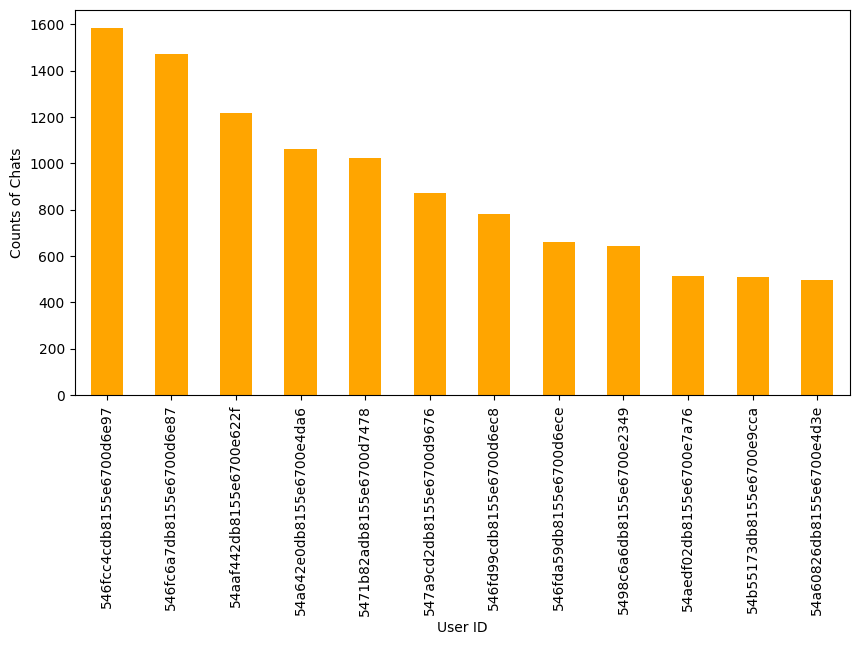

In [20]:

# visualization
plt.figure(figsize=(10,5))
df04['fromUser.id'].value_counts().head(12).plot(kind='bar',color='orange')
plt.xlabel("User ID")
plt.ylabel("Counts of Chats")
plt.show()


In [21]:

# to clean the text form words with '@' at the beginning
#re.sub(r'(?:@)\w+\s','',df04['text'][1])


In [22]:

# 'fromUser.id' of the most chatting user
id_max = df04['fromUser.id'].value_counts().index[0]
id_max


'546fcc4cdb8155e6700d6e97'

In [23]:

# take a look of the user with the most chats
df04[df04['fromUser.id'] == id_max]


,fromUser.id,text
5,546fcc4cdb8155e6700d6e97,that sounds like torture actually :)
11,546fcc4cdb8155e6700d6e97,"I have zero intention of doing the whole diet bit of it, I just want the nommy creamy fatty coffee"
12,546fcc4cdb8155e6700d6e97,and the energy
16,546fcc4cdb8155e6700d6e97,I would if I didn’t have my son and his family camping in my den
17,546fcc4cdb8155e6700d6e97,tho we aren’t that close to santa monica
...,...,...
22947,546fcc4cdb8155e6700d6e97,@MichaelLockrey is there currently software available that translates spoken language to text for the hearing impaired?
22955,546fcc4cdb8155e6700d6e97,:thumbsup:
22965,546fcc4cdb8155e6700d6e97,"^ means you are agreeing with the person above you, ^^ means mrowwww"
22966,546fcc4cdb8155e6700d6e97,:P


In [24]:

# the first 10 chats
df04[df04['fromUser.id']==id_max].text.head(10)


5                                                                   that sounds like torture actually :)
11    I have zero intention of doing the whole diet bit of it, I just want the nommy creamy fatty coffee
12                                                                                        and the energy
16                                      I would if I didn’t have my son and his family camping in my den
17                                                              tho we aren’t that close to santa monica
19                                  hmm, 2 hour drive, but thats because the freeways are a nightmare :)
24                              HAH I’m using skitch for bills my kids owe me, pink pointers everywhere!
25                                                                             I’m the most annoying mom
43                                                                welcome to FreeCodeCamp @AhsanBudhani 
44                                                     

In [25]:

df04_text = df04[df04['fromUser.id']==id_max].text
df04_text


5                                                                                           that sounds like torture actually :)
11                            I have zero intention of doing the whole diet bit of it, I just want the nommy creamy fatty coffee
12                                                                                                                and the energy
16                                                              I would if I didn’t have my son and his family camping in my den
17                                                                                      tho we aren’t that close to santa monica
                                                                  ...                                                           
22947    @MichaelLockrey is there currently software available that translates spoken language to text for the hearing impaired?
22955                                                                                            

# preparing data for LSTM (Long-Short_Term_Memory) - Network

In [26]:

# whole text of most chatting person
text01 = ''.join(map(str,df04_text))
text01[:500]


'that sounds like torture actually :)I have zero intention of doing the whole diet bit of it, I just want the nommy creamy fatty coffeeand the energyI would if I didn’t have my son and his family camping in my dentho we aren’t that close to santa monicahmm, 2 hour drive, but thats because the freeways are a nightmare :)HAH I’m using skitch for bills my kids owe me, pink pointers everywhere!I’m the most annoying momwelcome to FreeCodeCamp @AhsanBudhani I’m partial to FCC challenges @aferch87 :)I t'

In [27]:

# preparing text before NLP (Natural Language Processing)
text02 = text01.lower()
text02[:500]


'that sounds like torture actually :)i have zero intention of doing the whole diet bit of it, i just want the nommy creamy fatty coffeeand the energyi would if i didn’t have my son and his family camping in my dentho we aren’t that close to santa monicahmm, 2 hour drive, but thats because the freeways are a nightmare :)hah i’m using skitch for bills my kids owe me, pink pointers everywhere!i’m the most annoying momwelcome to freecodecamp @ahsanbudhani i’m partial to fcc challenges @aferch87 :)i t'

In [28]:

# to clean the text form words with '@' at the beginning
text03 = re.sub(r'(?:@)\w+\s','',text02)
text03[:500]


'that sounds like torture actually :)i have zero intention of doing the whole diet bit of it, i just want the nommy creamy fatty coffeeand the energyi would if i didn’t have my son and his family camping in my dentho we aren’t that close to santa monicahmm, 2 hour drive, but thats because the freeways are a nightmare :)hah i’m using skitch for bills my kids owe me, pink pointers everywhere!i’m the most annoying momwelcome to freecodecamp i’m partial to fcc challenges :)i think you’ll get plenty o'

In [29]:

# removing html-tags:
text04 = re.sub(r'<.*?>', '', text03)
text04[:1500]


'that sounds like torture actually :)i have zero intention of doing the whole diet bit of it, i just want the nommy creamy fatty coffeeand the energyi would if i didn’t have my son and his family camping in my dentho we aren’t that close to santa monicahmm, 2 hour drive, but thats because the freeways are a nightmare :)hah i’m using skitch for bills my kids owe me, pink pointers everywhere!i’m the most annoying momwelcome to freecodecamp i’m partial to fcc challenges :)i think you’ll get plenty of exposure through out the challengeshi there happy new yeari do it all the time :)greetings welcome aboardwelcome back i hope you had a great vacation i don’t do resolutions :) i try to always be and do my besthello janeway "there are three things to remember about being a starship captain: keep your shirt tucked in, go down with the ship, and never abandon a member of your crew."you mean upper east coast?well i didn’t hear it but it is the pepperidge farms guys accentsort of maine newhampshir

In [30]:

# removing special charakters:
text05 = re.sub(r'[^a-zA-Z0-9\s]', '', text04)
text05[:1500]


'that sounds like torture actually i have zero intention of doing the whole diet bit of it i just want the nommy creamy fatty coffeeand the energyi would if i didnt have my son and his family camping in my dentho we arent that close to santa monicahmm 2 hour drive but thats because the freeways are a nightmare hah im using skitch for bills my kids owe me pink pointers everywhereim the most annoying momwelcome to freecodecamp im partial to fcc challenges i think youll get plenty of exposure through out the challengeshi there happy new yeari do it all the time greetings welcome aboardwelcome back i hope you had a great vacation i dont do resolutions  i try to always be and do my besthello janeway there are three things to remember about being a starship captain keep your shirt tucked in go down with the ship and never abandon a member of your crewyou mean upper east coastwell i didnt hear it but it is the pepperidge farms guys accentsort of maine newhampshireoh yesno 43 was changed befor

In [31]:
len(text05)

70874

In [32]:
type(text05)

str

In [33]:

# new form --> arrays of semi-overlapping sequences of uniform length and next characters
# length (40 - 60, chats - texts) of extracted character sequences
len_seq = 40

# create a new sequence every `step` characters (3 in the cause of the spaces)
step = 3

# a list of the extracted sequences
sentences = []

# a list of the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text05) - len_seq, step):
    sentences.append(text05[i: i + len_seq])
    next_chars.append(text05[i + len_seq])
print('Number of sequences:', len(sentences))


Number of sequences: 23612


In [34]:
sentences[:5]

['that sounds like torture actually i have',
 't sounds like torture actually i have ze',
 'ounds like torture actually i have zero ',
 'ds like torture actually i have zero int',
 'like torture actually i have zero intent']

In [35]:
next_chars[:5]

[' ', 'r', 'i', 'e', 'i']

In [36]:
len(next_chars)

23612

In [37]:

# List of unique characters in the corpus
chars = sorted(list(set(text05)))
print('Unique characters:', len(chars))


Unique characters: 39


In [38]:
chars[:5]

['\t', '\n', ' ', '0', '1']

In [39]:

# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((c, i) for i,c in enumerate(chars))
char_indices


{'\t': 0,
 '\n': 1,
 ' ': 2,
 '0': 3,
 '1': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '6': 9,
 '7': 10,
 '8': 11,
 '9': 12,
 'a': 13,
 'b': 14,
 'c': 15,
 'd': 16,
 'e': 17,
 'f': 18,
 'g': 19,
 'h': 20,
 'i': 21,
 'j': 22,
 'k': 23,
 'l': 24,
 'm': 25,
 'n': 26,
 'o': 27,
 'p': 28,
 'q': 29,
 'r': 30,
 's': 31,
 't': 32,
 'u': 33,
 'v': 34,
 'w': 35,
 'x': 36,
 'y': 37,
 'z': 38}

In [40]:

# data as sparse boolean tensors
# --> array-form of x,y for sentences,next_chars with the right shapes
x = np.zeros((len(sentences),len_seq,len(chars)),dtype=np.bool_)
y = np.zeros((len(sentences),len(chars)),dtype=np.bool_)


In [41]:
x.shape

(23612, 40, 39)

In [42]:
y.shape

(23612, 39)

In [43]:

# one-hot encode the characters into binary arrays
for i,sentence in enumerate(sentences):
    for t,char in enumerate(sentence):
        x[i,t,char_indices[char]] = 1
    y[i,char_indices[next_chars[i]]] = 1
    

In [44]:
x[:2]

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False, False]]])

In [45]:
y[:2]

array([[False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False]])

# Building the network

In [46]:
from keras import layers

In [ ]:

# network = 1 LSTM layer, 1 Dense classifier and softmax (over all charakters)
model = keras.models.Sequential()
model.add(layers.LSTM(128,input_shape=(len_seq,len(chars))))
model.add(layers.Dense(len(chars),activation='softmax'))


In [48]:

# loss for training the model --> categorical_crossentropy (y = one hot encodede and not categorical)
opti = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opti)


In [49]:

# training the model and sampling from that with reweighted distributions
# --> sample-function with one temperature
def sample(predictions,temp=1.0):
    predictions = np.asarray(predictions).astype('float64')
    predictions = np.log(predictions) / temp
    exp_predictions = np.exp(predictions)
    predictions = exp_predictions / np.sum(exp_predictions)
    probas = np.random.multinomial(1,predictions,1)
    return np.argmax(probas)


In [50]:

# different temperatures after every epoch (min. 20):
# --> trends and effects of my model relating to temperature and type of sampling
for epoch in range(1, 40):
    print('EPOCH', epoch)
    # Fit the model for 1 epoch (=default) on the available training data
    model.fit(x, y, batch_size=128)

    # Select a text seed at random
    start_index = random.randint(0, len(text05) - len_seq - 1)
    generated_text = text05[start_index: start_index + len_seq]
    print('___GENERATING with seed___: "' + generated_text + '"')

    for temp in [0.2, 0.5, 1.0, 1.2]:
        print('___TEMPERATURE___: ', temp)
        sys.stdout.write(generated_text)

        # 300 characters generated:
        for i in range(300):
            sampled = np.zeros((1, len_seq, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            predictions = model.predict(sampled, verbose=0)[0]
            next_index = sample(predictions, temp)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


EPOCH 1

185/185 [==============================] - 13s 60ms/step - loss: 2.5802
___GENERATING with seed___: "issue try porting it over to codepen so "
___TEMPERATURE___:  0.2
issue try porting it over to codepen so i weang the to to to te we to to ang to ne to me to a a tu to the to we to ne ing the a be to ang to were we to noun the toun we we to a me to me to nound to me be to be te to the the to noun the to we we to noun to we to me we to be to me to i se the to me to noun the to a to mang to to ne to be to
___TEMPERATURE___:  0.5
 noun the to a to mang to to ne to be to the a mang se to i fel in we an an le fon ton te wet so fre to tane fore mecound we bok toming to jeang wore a for ant weang pang a pang the want tureamang as you t in the coun were werung i ti ne thang thang to mame ang to mang the i dou tong to ge hing we be he we were gem an wet i  and int ge we
___TEMPERATURE___:  1.0
e he we were gem an wet i  and int ge weadeang m ghe weanjfwitlall mave i pante fougtthime na 

In [51]:

# results:
# --> best with temperature 0.5!
# --> low temperatures (repetitive and realistic)
# --> higher temperatures (local structure of chars and words disappear)

#    --> i always get the best results with a clever balance between learned structure and randomness!
